In [2]:
import matplotlib.pyplot as plt

In [1]:
test_image = '/home/jovyan/data/2412593_1060618_2019-06-02_0f4d/2412593_1060618_2019-06-02_0f4d_BGRN_Analytic.tif'

In [36]:
import rasterio 
import numpy as np
import glob
import os,sys
from multiprocessing import Pool, cpu_count

In [4]:
ds = rasterio.open(test_image)
b1 = ds.read(1)

In [5]:
np.shape(b1)

(8000, 8000)

In [6]:
list_arr = np.split(b1,[64,64])

In [27]:
len(list_arr)

3

In [28]:
np.shape(list_arr[0])

(64, 8000)

In [30]:
test_ar = np.zeros((8,8))

In [31]:
test_ar

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [34]:
np.split(test_ar,2,axis=1)

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])]

In [7]:
def blockshaped(arr, nrows, ncols):
    ### thanks to stack overflow
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

In [38]:
out = blockshaped(b1,64,64)

In [40]:
out[1]

array([[5074, 5089, 5071, ..., 4089, 4111, 4102],
       [5051, 4973, 4932, ..., 4125, 4121, 4011],
       [4989, 4803, 4603, ..., 4091, 4063, 4029],
       ...,
       [4066, 4026, 4033, ..., 4066, 4113, 4181],
       [4056, 4005, 3979, ..., 4082, 4105, 4137],
       [4043, 4018, 4001, ..., 4114, 4112, 4083]], dtype=uint16)

In [4]:
def chunk_bands(fn):
    ds = rasterio.open(fn)
    band_list = [np.ma.masked_equal(ds.read(x),0) for x in range(1,5)]
    band_chunk_list = [blockshaped(band,64,64) for band in band_list]
    return band_chunk_list

In [6]:
out_chunks = chunk_bands(test_image)

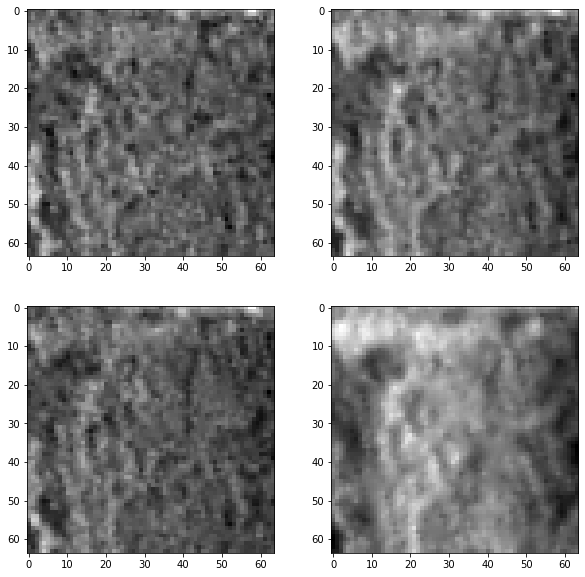

In [7]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
chunknum = 163
cmap = 'gray'
ax[0,0].imshow(out_chunks[0][chunknum],cmap=cmap)
ax[0,1].imshow(out_chunks[1][chunknum],cmap=cmap)
ax[1,0].imshow(out_chunks[2][chunknum],cmap=cmap)
ax[1,1].imshow(out_chunks[3][chunknum],cmap=cmap)

In [56]:
np.shape(out_chunks[0][10])

(64, 64)

In [47]:
out_chunks[1][0]

array([[3628, 3656, 3610, ..., 4631, 4642, 4570],
       [3699, 3671, 3639, ..., 4638, 4592, 4508],
       [3678, 3647, 3622, ..., 4582, 4515, 4422],
       ...,
       [3489, 3535, 3625, ..., 3334, 3399, 3470],
       [3482, 3514, 3557, ..., 3388, 3375, 3415],
       [3492, 3523, 3529, ..., 3441, 3417, 3408]], dtype=uint16)

In [59]:
np.shape(out_chunks[0])

(15625, 64, 64)

In [60]:
125*125

15625

In [8]:
blue_chunk = out_chunks[0][45] 
green_chunk = out_chunks[1][45]
red_chunk = out_chunks[2][45]
nir_chunk = out_chunks[3][45]

In [65]:
idx_snow = nir_chunk==625

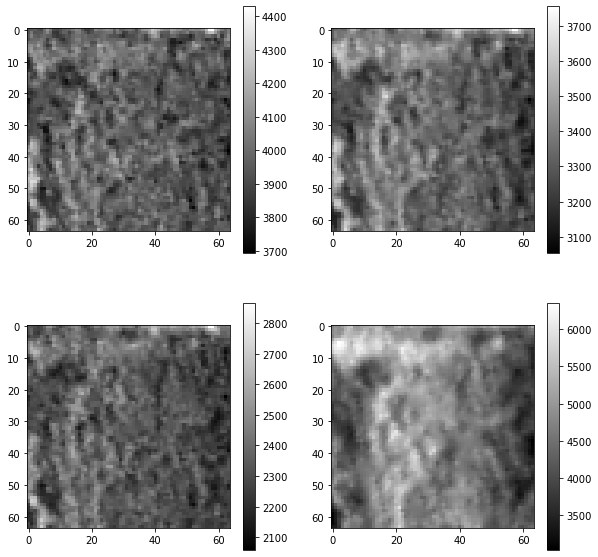

In [10]:
fig,axa = plt.subplots(2,2,figsize=(10,10))
chunknum = 163
cmap = 'gray'
im1 = axa[0,0].imshow(out_chunks[0][chunknum],cmap=cmap)
im2 = axa[0,1].imshow(out_chunks[1][chunknum],cmap=cmap)
im3 = axa[1,0].imshow(out_chunks[2][chunknum],cmap=cmap)
im4 = axa[1,1].imshow(out_chunks[3][chunknum],cmap=cmap)
plt.colorbar(im1,ax=axa[0,0])
plt.colorbar(im2,ax=axa[0,1])
plt.colorbar(im3,ax=axa[1,0])
plt.colorbar(im4,ax=axa[1,1])

In [11]:
snow_idx_nir = np.ma.masked_greater(nir_chunk,3420) 
snow_idx_green = np.ma.masked_greater(green_chunk , 2000)
snow_idx_red = np.ma.masked_less(red_chunk,4000)
snow_idx_blue = np.ma.masked_less(blue_chunk,2000)

In [16]:
out_fn_snow = np.zeros((64,64))

In [14]:
mask_snow_idx = np.logical_and.reduce((snow_idx_nir.mask,snow_idx_green.mask,snow_idx_red.mask,snow_idx_blue.mask))
#np.ma.array(data, mask=mask)

In [27]:
out_fn_snow[np.where(mask_snow_idx!=1)] = 1

In [25]:
out_fn_snow[mask_snow_idx] = 1

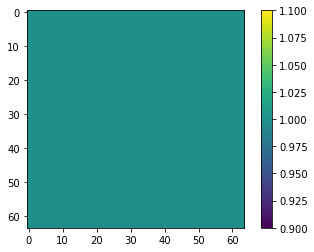

In [28]:
im = plt.imshow(out_fn_snow)
plt.colorbar(im)

In [73]:
snow_idx_nir

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=False,
  dtype=bool)

### Doing the actual thing

In [2]:
class_np_list = sorted(glob.glob('/srv/shared/planetpieces/training/*.npy'))

In [6]:
ar = np.load(class_np_list[0])

In [10]:
len(blockshaped(ar,64,64))

15625

In [32]:
def save_chunks(input_list):
    """
    input list is [npy,fn,i]
    """
    npy = input_list[0][0]
    fn = input_list[0][1]
    i = input_list[1]
    outfn = os.path.splitext(fn)[0]+'_chunk_{}.npy'.format(i)
    np.save(outfn,npy)

In [40]:
def chunk_class(outfolder,fn):
    np_arr = np.load(fn)
    band_chunked = blockshaped(np_arr,64,64)
    outfn = os.path.join(outfolder,(os.path.basename(fn)))
    fn_list = [outfn]*len(band_chunked)
    save_list = list(zip(band_chunked,fn_list))
    save_list = list(zip(save_list,np.arange(len(band_chunked))))
    with Pool(cpu_count()*2) as p:
        p.map(save_chunks, [chunks for chunks in save_list])
    #return save_list
    #for i in range(len(band_chunked)):
     #   outfn = os.path.splitext(fn)[0]+'_chunk_{}.npy'.format(i)
      #  np.save(outfn,band_chunked[i])

In [38]:
chunk_class(class_np_list[0])

In [23]:
test = chunk_class(class_np_list[0])

In [39]:
os.path.join(outfolder,(os.path.basename(class_np_list[0])))

'2412593_1060618_2019-06-02_0f4d_BGRN_Analytic_class.npy'

In [ ]:
outfolder = '/srv/shared/planetpieces/chunks/class/'
for classified in class_np_list:
    chunk_class(outfolder,classified)

In [ ]:
def parallel_chunk_bands(outfolder,fn):
    ds = rasterio.open(fn)
    band_list = [np.ma.masked_equal(ds.read(x),0) for x in range(1,5)]
    band_chunk_list = [blockshaped(band,64,64) for band in band_list]
    out_stack = np.stack(band_chunk_list,axis=0)
    outfn = os.path.splitext(os.path.join(outfolder,os.path.basename(fn)))[0]+'_img.npy'
    fn_list = [outfn]*np.shape(out_stack)[1]
    list_out = [out_stack[:,i,:,:] for i in range(np.shape(out_stack)[1])]
    save_list = list(zip(list_out,fn_list))
    save_list = list(zip(save_list,np.arange(np.shape(out_stack)[1])))
    with Pool(cpu_count()*4) as p:
        p.map(save_chunks, [chunks for chunks in save_list])

    
    return band_chunk_list